In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

print("Imported successfully!")

Imported successfully!


In [ ]:
fracking = pd.read_csv('drive/MyDrive/2012_FracFocusReport.txt', delimiter='\t')
print(fracking)

       r_seqid  pdf_seqid           api fracture_date     state      county  \
0          488      30474  42-479-41540    2012-03-16     Texas        Webb   
1          510      30528  49-037-28547    2012-08-18   Wyoming  Sweetwater   
2          520      30538  42-285-33652    2012-09-03     Texas      Lavaca   
3          532      30480  42-479-41581    2012-03-03     Texas        Webb   
4          553      30497  42-103-35880    2012-01-09     Texas       Crane   
...        ...        ...           ...           ...       ...         ...   
34365    37059      37988  49-025-23780    2012-10-25   Wyoming     Natrona   
34366    37061      37992  49-025-23771    2012-10-22   Wyoming     Natrona   
34367    37062      37993  49-025-23760    2012-10-18   Wyoming     Natrona   
34368    37063      37994  49-025-05023    2012-10-18   Wyoming     Natrona   
34369    37064      38028  05-123-34406    2012-09-12  Colorado        Weld   

                                      operator     

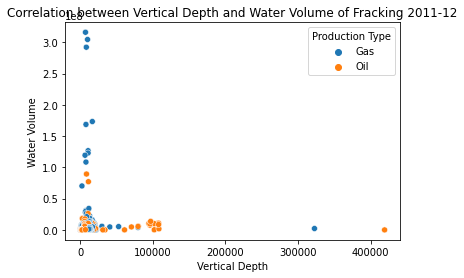

In [ ]:
def str2Num(a):
  try:
    return int(float(a))
  except:
    return -1

vertical = fracking['true_vertical_depth'].apply(lambda a: str2Num(a))
volume = fracking['total_water_volume'].apply(lambda a: str2Num(a))
proType = fracking['production_type']
theData = [(ve, vo, pro) for ve, vo, pro in zip(vertical, volume, proType) if ve != -1 and vo != -1 and ve < 500000]

sns.scatterplot(x=[d[0] for d in theData], y=[d[1] for d in theData], hue=[d[2] for d in theData])
plt.legend(title='Production Type')
plt.xlabel('Vertical Depth')
plt.ylabel('Water Volume')
plt.title('Correlation between Vertical Depth and Water Volume of Fracking 2011-12')
plt.show()

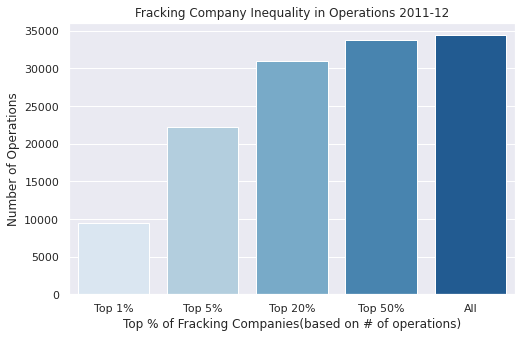

In [ ]:
all_operators = np.unique(fracking['operator'])
x = {o: len(fracking[fracking['operator']==o]) for o in all_operators}
operator2amount = dict(sorted(x.items(), key=lambda item: item[1], reverse=True))

amount_values = list(operator2amount.values())
top1P = sum(amount_values[:4])
top5P = sum(amount_values[:17])
top20P = sum(amount_values[:62])
top50P = sum(amount_values[:157])
all = sum(amount_values)

sns.set(rc = {'figure.figsize':(8,5)})
sns.barplot(x=['Top 1%', 'Top 5%', 'Top 20%', 'Top 50%', 'All'], y=[top1P, top5P, top20P, top50P, all], palette='Blues')
plt.xlabel('Top % of Fracking Companies(based on # of operations)')
plt.ylabel('Number of Operations')
plt.title('Fracking Company Inequality in Operations 2011-12')
plt.show()

In [ ]:
state2code = {'Alabama':'AL', 'Alaska':'AK', 'Arkansas':'AR', 'California':'CA', 'Colorado':'CO', 'Iowa':'IA', 'Kansas':'KS', 'Louisiana':'LA', 'Michigan':'MI',
              'Minnesota':'MN', 'Mississippi':'MS', 'Missouri':'MO', 'Montana':'MT', 'New Mexico':'NM', 'North Dakota':'ND', 'Ohio':'OH', 'Oklahoma':'OK',
              'Pennsylvania':'PA', 'Tennessee':'TN', 'Texas':'TX', 'Utah':'UT', 'Virginia':'VA', 'West Virginia':'WV', 'Wyoming':'WY',
              'Connecticut':'CT', 'Delaware':'DE', 'District of Columbia':'DC', 'Florida':'FL', 'Georgia':'GA', 'Hawaii':'HI', 'Idaho':'ID',
              'Illinois':'IL', 'Indiana':'IN', 'Kentucky':'KY', 'Maine':'ME', 'Maryland':'MD', 'Massachusetts':'MA', 'Michigan':'MI', 
              'Minnesota':'MN', 'Nebraska':'NE', 'Nevada':'NV', 'New Hampshire':'NH', 'New Jersey':'NJ', 'New York':'NY', 
              'North Carolina':'NC', 'Oregon':'OR', 'Puerto Rico':'PR', 'Rhode Island':'RI', 'South Carolina':'SC', 'South Dakota':'SD',
              'Vermont':'VT', 'Virgin Islands':'VI', 'Washington':'WA', 'Wisconsin':'WI'}
fracking['state_code'] = fracking['state'].apply(lambda state: state2code[state])

code2operations = {s: len(fracking[fracking['state_code']==s]) for s in np.unique(fracking['state_code'])}

df = pd.DataFrame({
    'State':list(code2operations.keys()),
    'Operations':list(code2operations.values())
})

fig = px.choropleth(df,
                    locations='State', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='Operations',
                    color_continuous_scale="emrld", 
                    )

fig.update_layout(
      title_text = 'Amount of Fracking Operations by State 2011-2012',
      title_font_family="Times New Roman",
      title_font_size = 22,
      title_font_color="black", 
      title_x=0.45, 
      )

fig.show()

In [ ]:
earthquakes = pd.read_csv('drive/MyDrive/query.csv')
earth1993 = pd.read_csv('drive/MyDrive/query1993.csv')
print(earthquakes)
print(earth1993)

                          time   latitude   longitude   depth   mag magType  \
0     2013-12-31T19:25:31.990Z  36.570000  -97.842000   4.400  2.60      ml   
1     2013-12-31T19:06:50.670Z  43.773400 -105.267000   0.000  3.30      ml   
2     2013-12-31T12:33:24.330Z  31.551667 -115.498667   8.503  3.06      ml   
3     2013-12-31T10:10:03.632Z  38.192200 -115.349100  10.700  3.00      ml   
4     2013-12-31T09:21:08.640Z  33.501500 -116.477333   7.984  3.08      ml   
...                        ...        ...         ...     ...   ...     ...   
1976  2013-01-03T02:44:17.310Z  31.228000 -116.125833   2.475  3.37      ml   
1977  2013-01-02T21:43:20.350Z  36.588667 -121.185833   4.221  2.57      md   
1978  2013-01-02T16:36:22.000Z  47.020000  -66.497000   5.000  3.00    mblg   
1979  2013-01-01T23:37:09.760Z  36.323667 -120.425667  12.144  2.91      md   
1980  2013-01-01T11:38:13.530Z  34.175000  -97.524000   5.000  2.60      ml   

        nst     gap     dmin     rms  ...          

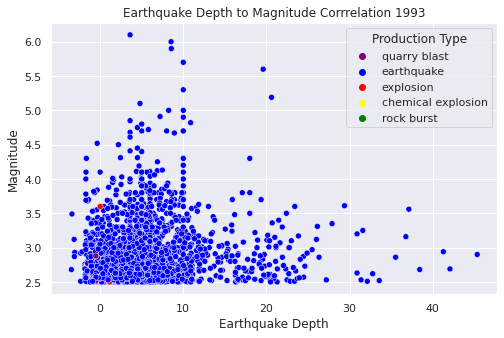

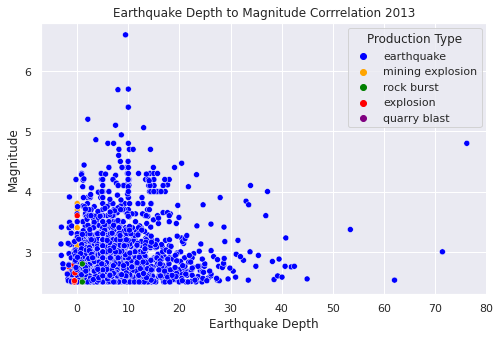

In [ ]:
sns.scatterplot(x='depth', y='mag', hue='type', data=earth1993, palette=['purple', 'blue', 'red', 'yellow', 'green'])
plt.xlabel('Earthquake Depth')
plt.ylabel('Magnitude')
plt.legend(title='Production Type')
plt.title('Earthquake Depth to Magnitude Corrrelation 1993')
plt.show()

sns.scatterplot(x='depth', y='mag', hue='type', data=earthquakes, palette=['blue', 'orange', 'green', 'red', 'purple'])
plt.xlabel('Earthquake Depth')
plt.ylabel('Magnitude')
plt.legend(title='Production Type')
plt.title('Earthquake Depth to Magnitude Corrrelation 2013')
plt.show()

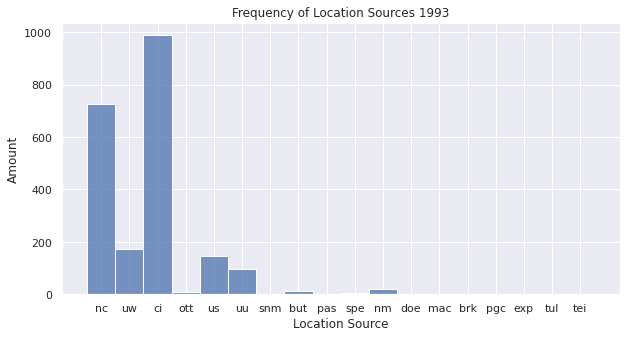

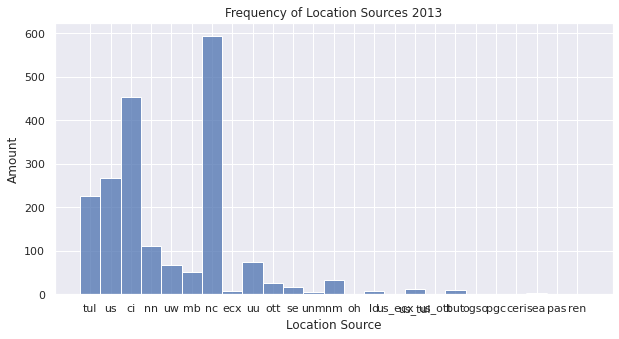

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(x='locationSource', data=earth1993)
plt.xlabel('Location Source')
plt.ylabel('Amount')
plt.title('Frequency of Location Sources 1993')
plt.show()

plt.figure(figsize=(10,5))
sns.histplot(x='locationSource', data=earthquakes)
plt.xlabel('Location Source')
plt.ylabel('Amount')
plt.title('Frequency of Location Sources 2013')
plt.show()

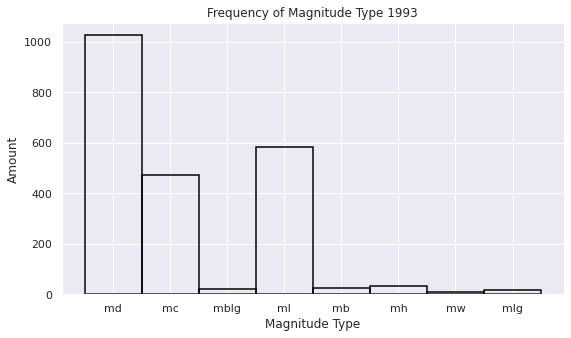

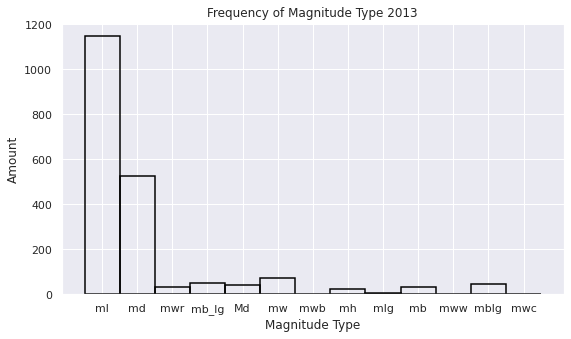

In [ ]:
plt.figure(figsize=(9,5))
sns.histplot(x='magType', data=earth1993, fill=False, color='black')
plt.xlabel('Magnitude Type')
plt.ylabel('Amount')
plt.title('Frequency of Magnitude Type 1993')
plt.show()

plt.figure(figsize=(9,5))
sns.histplot(x='magType', data=earthquakes, fill=False, color='black')
plt.xlabel('Magnitude Type')
plt.ylabel('Amount')
plt.title('Frequency of Magnitude Type 2013')
plt.show()

In [ ]:
def loc2state(loc):
  if loc.split(' ')[-1] in list(state2code.values()):
    return loc.split(' ')[-1]

  statesIn = []
  for state in list(state2code.keys()):
    if state in loc:
      statesIn.append(state)

  if len(statesIn) == 1:
    return state2code[statesIn[0]]

  try:
    maxLen = max([len(x) for x in statesIn])
    return [state2code[x] for x in statesIn if len(x) == maxLen][0]
  except:
    return 'Not State'

earthquakes['state'] = earthquakes['place'].apply(lambda loc: loc2state(loc))
earth1993['state'] = earth1993['place'].apply(lambda loc: loc2state(loc))
print(earthquakes['state'])
print(earth1993['state'])

0              OK
1              WY
2       Not State
3              NV
4              CA
          ...    
1976    Not State
1977           CA
1978    Not State
1979           CA
1980           OK
Name: state, Length: 1981, dtype: object
0              CA
1              CA
2              CA
3              CA
4              OR
          ...    
2183           CA
2184           MT
2185    Not State
2186           CA
2187           NC
Name: state, Length: 2188, dtype: object


In [ ]:
code2amount2013 = {s: len(earthquakes[earthquakes['state']==s]) for s in np.unique(earthquakes['state'])}
code2amount1993 = {s: len(earthquakes[earth1993['state']==s]) for s in np.unique(earth1993['state'])}

df2013 = pd.DataFrame({
    'State':list(code2amount2013.keys()),
    'Amount':list(code2amount2013.values())
})

df1993 = pd.DataFrame({
    'State':list(code2amount1993.keys()),
    'Amount':list(code2amount1993.values())
})

fig = px.choropleth(df1993,
                    locations='State', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='Amount',
                    color_continuous_scale="sunset"
                    )

fig.update_layout(
      title_text = 'Amount of Earthquakes in Each State 1993',
      title_font_family="Times New Roman",
      title_font_size = 22,
      title_font_color="black", 
      title_x=0.45, 
      )

fig.show()

fig = px.choropleth(df2013,
                    locations='State', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='Amount',
                    color_continuous_scale="sunset", 
                    range_color=(0,1200)
                    )

fig.update_layout(
      title_text = 'Amount of Earthquakes in Each State 2013',
      title_font_family="Times New Roman",
      title_font_size = 22,
      title_font_color="black", 
      title_x=0.45, 
      )

fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



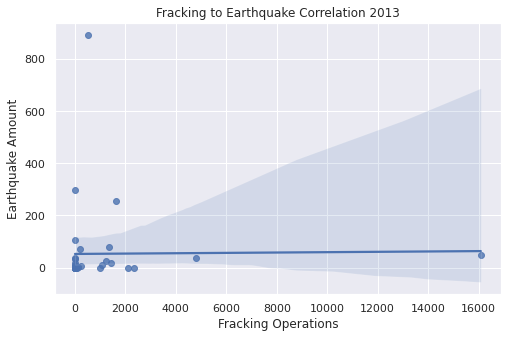

In [ ]:
combined = df.merge(df2013, how='outer', on='State')
combined = combined.fillna(0)

sns.regplot(x='Operations', y='Amount', data=combined)
plt.xlabel('Fracking Operations')
plt.ylabel('Earthquake Amount')
plt.title('Fracking to Earthquake Correlation 2013')
plt.show()

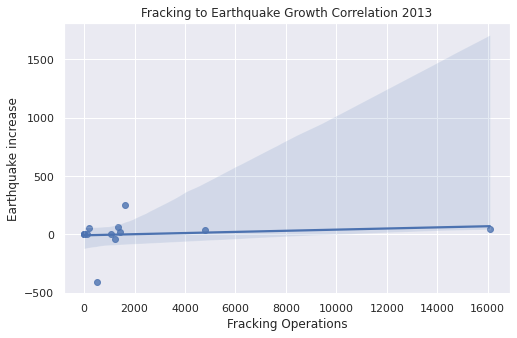

In [ ]:
def earthquake_growth(state):
  try:
    oldEarthquakes = int(df1993[df1993['State']==state]['Amount'])
    newEarthquakes = int(df2013[df2013['State']==state]['Amount'])
    return newEarthquakes - oldEarthquakes
  except:
    return None

state2growth = pd.DataFrame({
    'State':np.array(df['State']),
    'Earthquake Growth':[earthquake_growth(s) for s in np.array(df['State'])]
})
state2growth = state2growth.dropna()

combined = df.merge(state2growth, how='outer', on='State')

sns.regplot(x='Operations', y='Earthquake Growth', data=combined)
plt.xlabel('Fracking Operations')
plt.ylabel('Earthquake increase')
plt.title('Fracking to Earthquake Growth Correlation 2013')
plt.show()

In [ ]:
small1993 = pd.read_csv('drive/MyDrive/small1993.csv')
small2013 = pd.read_csv('drive/MyDrive/small2013.csv')

print(small1993)
print(small2013)

                           time   latitude   longitude   depth   mag magType  \
0      1993-12-31T23:46:06.490Z  37.632167 -118.882333   7.480  0.60      md   
1      1993-12-31T23:42:09.880Z  37.630167 -118.874667   6.669  0.77      md   
2      1993-12-31T23:34:33.590Z  46.060833 -122.081667  11.829  0.40      md   
3      1993-12-31T23:05:14.790Z  37.650500 -118.940500   0.074  0.99      md   
4      1993-12-31T23:04:50.840Z  37.653167 -118.941000   1.444  0.85      md   
...                         ...        ...         ...     ...   ...     ...   
12896  1993-01-01T03:37:48.370Z  34.304000 -116.420000   7.458  0.99      mc   
12897  1993-01-01T03:36:10.440Z  37.644167 -118.872500   2.336  0.90      md   
12898  1993-01-01T02:19:46.660Z  35.972000 -117.743000   3.688  0.98      mc   
12899  1993-01-01T02:06:47.590Z  34.293000 -116.462000   2.628  0.95      mc   
12900  1993-01-01T00:44:52.060Z  37.142500 -121.547167   2.877  1.00      md   

       nst    gap     dmin    rms  ... 

In [ ]:
small1993['state'] = small1993['place'].apply(lambda loc: loc2state(loc))
small2013['state'] = small2013['place'].apply(lambda loc: loc2state(loc))

print(small1993['state'])
print(small2013['state'])

0        CA
1        CA
2        WA
3        CA
4        CA
         ..
12896    CA
12897    CA
12898    CA
12899    CA
12900    CA
Name: state, Length: 12901, dtype: object
0        CA
1        UT
2        CA
3        CA
4        CA
         ..
16680    CA
16681    NV
16682    CA
16683    CA
16684    CA
Name: state, Length: 16685, dtype: object


In [ ]:
code2small1993 = {s: len(earthquakes[small1993['state']==s]) for s in np.unique(small1993['state'])}
code2small2013 = {s: len(earthquakes[small2013['state']==s]) for s in np.unique(small2013['state'])}

df2013small = pd.DataFrame({
    'State':list(code2small2013.keys()),
    'Amount':list(code2small2013.values())
})

df1993small = pd.DataFrame({
    'State':list(code2small1993.keys()),
    'Amount':list(code2small1993.values())
})

fig = px.choropleth(df1993small,
                    locations='State', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='Amount',
                    color_continuous_scale="inferno_r",
                    range_color=(0,1600)
                    )

fig.update_layout(
      title_text = 'Amount of Minor Earthquakes in Each State 1993',
      title_font_family="Times New Roman",
      title_font_size = 22,
      title_font_color="black", 
      title_x=0.45, 
      )

fig.show()

fig = px.choropleth(df2013small,
                    locations='State', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='Amount',
                    color_continuous_scale="inferno_r"
                    )

fig.update_layout(
      title_text = 'Amount of Minor Earthquakes in Each State 2013',
      title_font_family="Times New Roman",
      title_font_size = 22,
      title_font_color="black", 
      title_x=0.45, 
      )

fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

